In [115]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [116]:
root = '/Users/dionysos/workarea/bke'
bdata = root + '/data' + '/emodnet'
out = root + '/data' + '/outs'


filename="/bchem_med_chl_out_sb4.nc"
fh=Dataset(out+filename,mode='r',format="NETCDF4")
print(fh)
nlats=fh.dimensions['lat'].size
nlons=fh.dimensions['lon'].size

nlons=int(nlons)
nlats=int(nlats)
rlon=np.array(fh["lon"])
rlat=np.array(fh["lat"])
z=np.array(fh["bat"])
z=np.where(z>-5.,0.,z)
#btemp=np.array(fh["btemp"])
bchm=np.array(fh["bchm_avg"])

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): lon(1005), lat(380)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float32 bat(lon, lat), float32 bchm_perc(lon, lat), float32 bchm_avg(lon, lat), float32 bchm_std(lon, lat)
    groups: 


In [117]:
lats,lons= np.meshgrid(rlat,rlon)

proj = ccrs.PlateCarree()

ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',facecolor=cfeature.COLORS['water'])
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '10m',facecolor=cfeature.COLORS['land'])
#coastline_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m')
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural', name='admin_1_states_provinces_lines',
    scale='50m', facecolor='none')

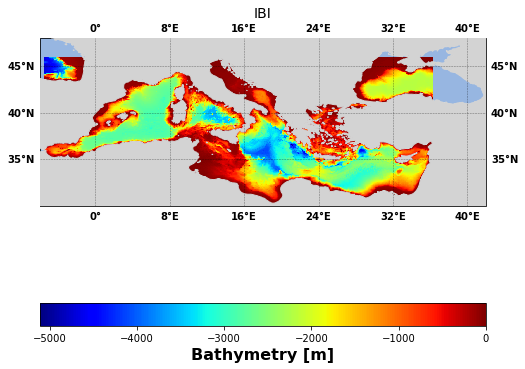

In [118]:
fig, ax = plt.subplots(subplot_kw=dict(projection=proj), figsize=(8, 12))
ax.set_extent([-6, 42, 30, 48], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color='lightgray', edgecolor='black', zorder=17)
ax.add_feature(cfeature.LAKES, alpha=0.9)
ax.add_feature(cfeature.BORDERS, zorder=10)
ax.add_feature(ocean_50m, zorder=1)
  # cfeature.COASTLINE, zorder=10)
#  ax.add_feature(coastline_50m, edgecolor='black', zorder=16)
ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5,
                    linestyle='--', draw_labels=True, zorder=18)
gl.tpop_xlabels = False
gl.left_ylabels = True
gl.right_ylabels = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-6,0, 8, 16, 24, 32, 40])
gl.ylocator = mticker.FixedLocator([28,30, 35, 40, 45, 48])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black', 'weight': 'bold'}
gl.ylabel_style = {'color': 'black', 'weight': 'bold'}

c = z
#print(np.shape(z),np.shape(lons),np.shape(lats))
cm = plt.pcolormesh(lons, lats, c, transform=ccrs.PlateCarree(), cmap='jet')
cb = fig.colorbar(cm, ax=ax, orientation='horizontal', fraction=0.08, aspect=20,
                    )#ticks=[-2000,-500, -200,-150, 100, -80, -60,-40,-20])

plt.title('IBI' , fontsize=14)
cb.set_label(r'Bathymetry [m]', rotation=0,weight='bold', fontsize=16)
lab = root + '/ibi+bat.jpg'
plt.savefig(lab, dpi=120)



In [119]:
lats,lons= np.meshgrid(rlat,rlon)

proj = ccrs.PlateCarree()

ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',facecolor=cfeature.COLORS['water'])
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '10m',facecolor=cfeature.COLORS['land'])
#coastline_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m')
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural', name='admin_1_states_provinces_lines',
    scale='50m', facecolor='none')

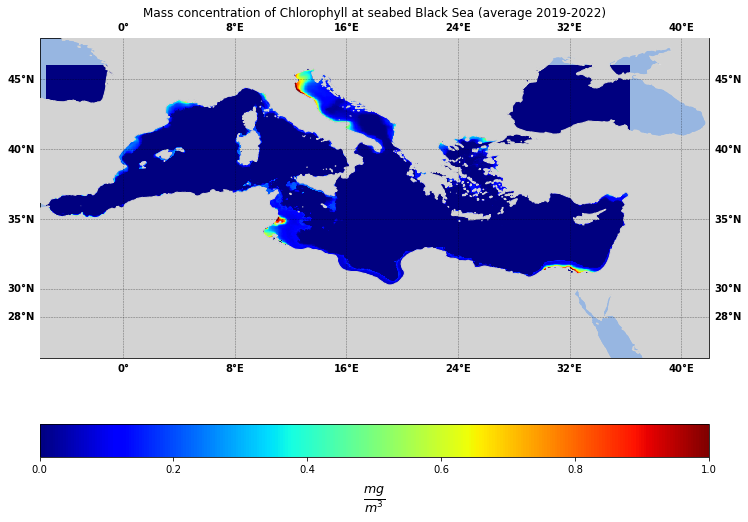

In [125]:
fig, ax = plt.subplots(subplot_kw=dict(projection=proj), figsize=(12, 8))
ax.set_extent([-6, 42, 25, 48], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color='lightgray', edgecolor='black', zorder=17)
ax.add_feature(cfeature.LAKES, alpha=0.9)
ax.add_feature(cfeature.BORDERS, zorder=10)
ax.add_feature(ocean_50m, zorder=1)
  # cfeature.COASTLINE, zorder=10)
#  ax.add_feature(coastline_50m, edgecolor='black', zorder=16)
ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5,
                    linestyle='--', draw_labels=True, zorder=18)
gl.tpop_xlabels = False
gl.left_ylabels = True
gl.right_ylabels = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-6,0, 8, 16, 24, 32, 40])
gl.ylocator = mticker.FixedLocator([28,30, 35, 40, 45, 48])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black', 'weight': 'bold'}
gl.ylabel_style = {'color': 'black', 'weight': 'bold'}

#cc=btemp/1000.+10
#cc=bsal
bchm=np.where(np.isnan(bchm),0.,bchm) 
cc=np.where(bchm>1.,1.,bchm) #phd
#cc=np.where(bchm>289.5,289.5,bchm) #oxy
#cc=np.where(cc<=180.,180.,cc)
#cc=np.where(cc<=36.5,36.5,cc)

#
#cc = np.log(bsal)
cc_min = np.min(cc)
cc_max = np.max(cc)
#print(np.shape(z),np.shape(lons),np.shape(lats))
cm = plt.pcolormesh(lons, lats, cc, transform=ccrs.PlateCarree(), cmap='jet',vmin=cc_min, vmax=cc_max)
#cm = plt.pcolormesh(lons, lats, cc, transform=ccrs.PlateCarree(), cmap='RdGy',vmin=cc_min, vmax=cc_max)
#lab=r'ppt' #salinity
#lab=r'$\frac{mmol}{m^3}$' #o2
lab=r'$\frac{mg}{m^3}$' #chl
#lab=r'$^{\circ}C$' #Temperature
#cb = m.colorbar(p,"bottom", ticks=[-4,-2,-0,2,5],size="5%", pad="10%")
cb = fig.colorbar(cm, ax=ax, orientation='horizontal', fraction=0.08, aspect=20,)
cb.set_label(lab, rotation=0)
cb.set_label(lab, fontsize=18, labelpad=10, fontweight='bold' )
#tkk=[-4,-2,-0,2,5]
#tkk=[-3,1,4]
#ltk=np.exp(tkk)
#stk=[]
#for ff in ltk:
#    print ('%5.1E' % ff)
#    stk.append( '%5.1E' % ff)
#cb.set_ticks(tkk)
#cb.ax.set_xticklabels(stk)
#plt.title(r' mole concentration of dissolved molecular oxygen in sea water at seabed Mediterranean Sea (90th percentile 2020-2022)' )
#plt.title(r' mole concentration of dissolved molecular oxygen in sea water at seabed Mediterranean Sea (average 2020-2022)' )


#plt.title(r'Mass concentration of Chlorophyll at seabed Black Sea (90th percentile 2019-2022)' )              
plt.title(r'Mass concentration of Chlorophyll at seabed Black Sea (average 2019-2022)' )              


#plt.title(r'Salinity at seabed Mediterranean Sea ($90^{th}$ percentile 2019-2022)' )              
#plt.title(r'Salinity at seabed Mediterranean Sea (mean value 2019-2022)' )              



#plt.title('Mar Mediterraneo' , fontsize=14)
#cb.set_label(r'Bathymetry [m]', rotation=0,weight='bold', fontsize=16)
lab = root + '/chl_med_sb4_avgx.jpg'
plt.savefig(lab, dpi=120)
plt.show()  

In [121]:
print(cc_min,cc_max)

0.0 1.0


In [122]:
np.max(cc)

1.0

In [24]:
np.max(bke)

0.0